Bitcoin Historical Data2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from matplotlib import cm

In [2]:
data = pd.read_csv("E:/github/Bitcoin Historical Data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
data = data[['Timestamp','Close','Volume_(BTC)']]
data['Timestamp'] = pd.to_datetime(data['Timestamp'],unit='s')
data = data.dropna()
data = data.set_index('Timestamp')
data = data.resample('MS').mean()

Make plot

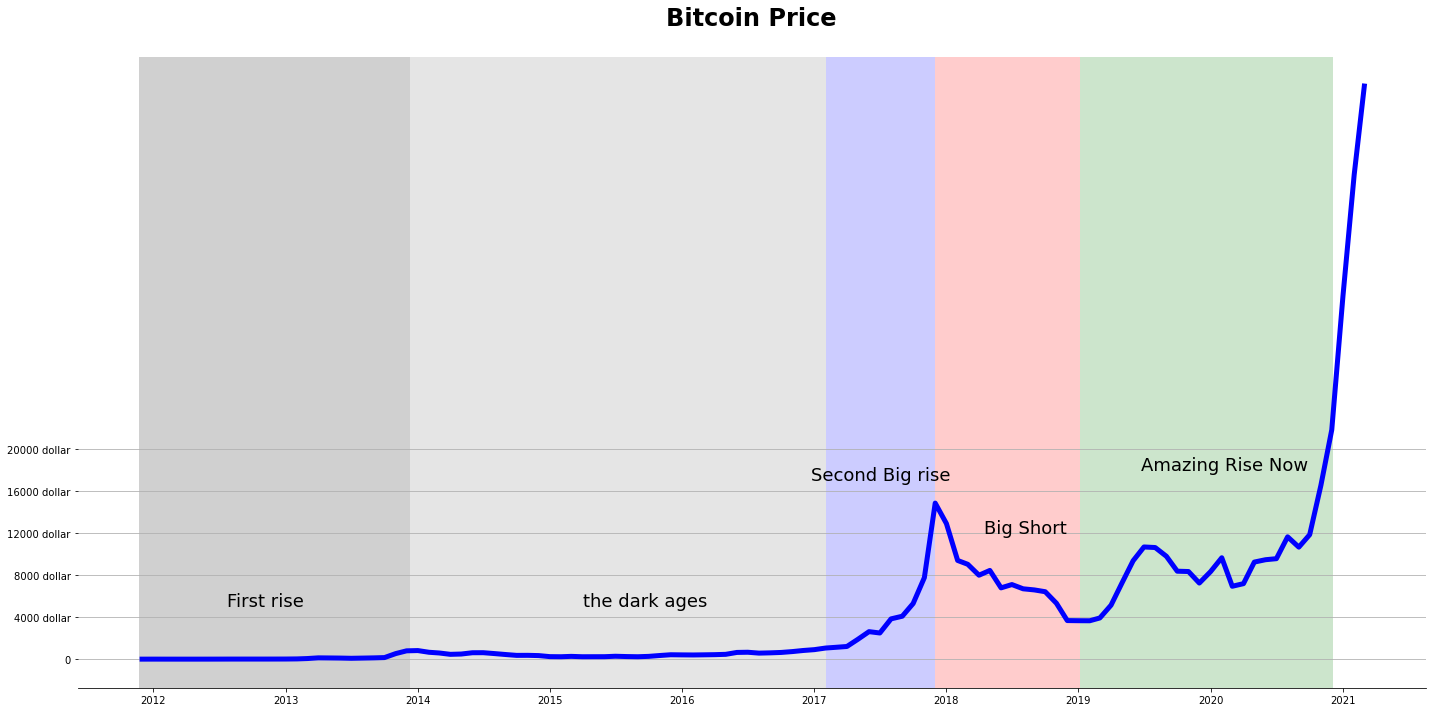

In [3]:
fig, ax = plt.subplots(figsize=(20, 10), facecolor="w")

ax.plot(data['Close'], color = 'blue', lw=5)

for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)

yticks = list(np.linspace(0, 20000, 6))
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y)} dollar" if y > 0 else "0" for y in yticks])

ax.grid(axis="y")

ax.set_title("Bitcoin Price", fontsize=24, fontweight="bold", pad=32)

font_textyear = {"fontsize": 18, "ha":"center"}

ax.axvspan(15300, 16050, fc="gray", alpha=0.2)
ax.text(15650, 5000, "First rise", fontdict=font_textyear, color="k")
ax.axvspan(15300, 17200, fc="gray", alpha=0.2)
ax.text(16700, 5000, "the dark ages", fontdict=font_textyear, color="k")
ax.axvspan(17200, 17500, fc="blue", alpha=0.2)
ax.text(17350, 17000, "Second Big rise", fontdict=font_textyear, color="k")
ax.axvspan(17500, 17900, fc="red", alpha=0.2)
ax.text(17750, 12000, "Big Short", fontdict=font_textyear, color="k")
ax.axvspan(17900, 18600, fc="green", alpha=0.2)
ax.text(18300, 18000, "Amazing Rise Now", fontdict=font_textyear, color="k")
    
fig.tight_layout()

In [4]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.dates as dates
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
stock=pd.read_csv("E:/github/Bitcoin Historical Data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
stock[0:3]

Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price  
0            4.39  
1             NaN  
2             NaN

In [6]:
n=len(stock)
data=stock[(n//1000)*990:(n//1000)*999]
test_data=stock[(n//1000)*999:]

In [7]:
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Timestamp'],y=data['Open'].rolling(window=28).mean(),name="BITCOIN"),secondary_y=False,)
fig.update_layout(autosize=False,width=700,height=500,title_text="BITCOIN")
fig.update_xaxes(title_text="timestamp")
fig.update_yaxes(title_text="price",secondary_y=False)
fig.show()

In [8]:
test_data[0:3]

Timestamp      Open      High       Low     Close  Volume_(BTC)  \
4852143  1616834820  54915.29  54915.29  54892.31  54894.67      0.033352   
4852144  1616834880  54894.67  54894.67  54835.69  54835.69      1.306450   
4852145  1616834940  54870.62  54895.89  54865.00  54895.89      7.344910   

         Volume_(Currency)  Weighted_Price  
4852143        1830.772045    54892.619104  
4852144       71660.385176    54851.218764  
4852145      402982.861340    54865.595540

In [9]:
print(len(data))
print(len(test_data))

43713
5234


In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Open'].values.reshape(-1,1))

In [11]:
prediction_days = 100

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [12]:
print(x_train.shape)
print(y_train.shape)

(43613, 100, 1)
(43613,)


In [13]:
def LSTM_model():
    
    model = Sequential()    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    return model

In [14]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [15]:
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', verbose = 1, save_best_only = True)
model.fit(x_train, y_train, epochs=5, batch_size = 32,callbacks = [checkpointer])

Epoch 1/5
1363/1363 [==============================] - 193s 135ms/step - loss: nan
Epoch 2/5
1363/1363 [==============================] - 188s 138ms/step - loss: nan
Epoch 3/5
1363/1363 [==============================] - 184s 135ms/step - loss: nan
Epoch 4/5
1363/1363 [==============================] - 185s 136ms/step - loss: nan
Epoch 5/5
1363/1363 [==============================] - 185s 136ms/step - loss: nan


In [16]:
actual_prices = test_data['Open'].values
total_dataset = pd.concat((data['Open'], test_data['Open']), axis=0)

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [17]:
x_test = []
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

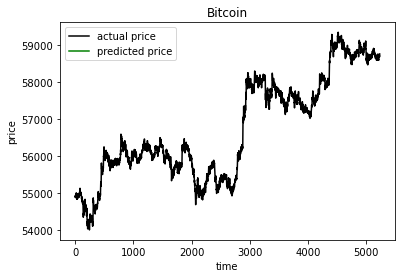

In [18]:
plt.plot(actual_prices, color='black', label=f"actual price")
plt.plot(predicted_prices, color= 'green', label=f"predicted price")
plt.title(f"Bitcoin")
plt.xlabel("time")
plt.ylabel(f"price")
plt.legend()
plt.show()

In [19]:
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))
print(real_data.shape)

(1, 99, 1)


In [20]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"prediction: {prediction}")

prediction: [[nan]]


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras import models, layers

In [22]:
df = pd.read_csv("E:/github/Bitcoin Historical Data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
df['price'] = (df['High']+ df['Low'])/2
df.drop(['Open','Close','Volume_(BTC)','Volume_(Currency)', 'Weighted_Price','High','Low'],axis=1, inplace=True)

df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit='s')
df = df.set_index('Timestamp')
df = df.resample('6H').mean()
df = df.dropna()

df.head()

price
Timestamp                    
2011-12-31 06:00:00  4.390000
2011-12-31 12:00:00  4.501667
2012-01-01 00:00:00  4.580000
2012-01-01 12:00:00  4.840000
2012-01-01 18:00:00  5.000000

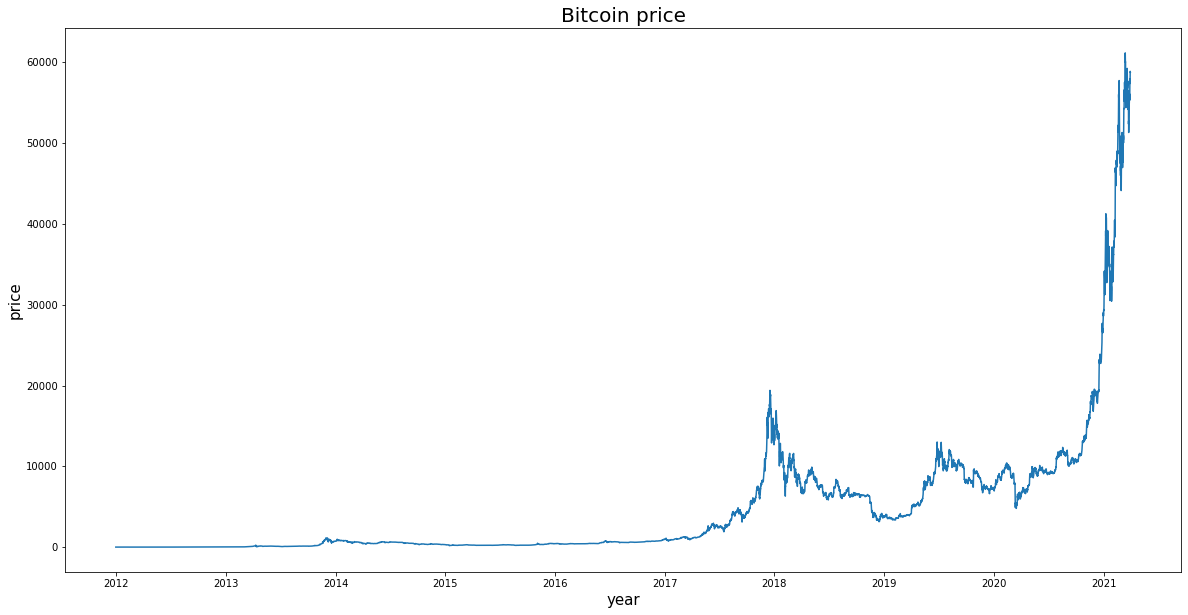

In [23]:
plt.figure(figsize=(20,10))
plt.plot(df)
plt.title('Bitcoin price',fontsize=20)
plt.xlabel('year',fontsize=15)
plt.ylabel('price',fontsize=15)
plt.show()

By using MinMaxScaler, The price range is (0 ~ 1) now.

In [24]:
scaler = MinMaxScaler()
price = scaler.fit_transform(np.array(df['price']).reshape(-1,1))
df['price'] = price

Sliding window and Split Train, Test data

In [25]:
X_l = []
y_l = []
N = len(df)
D = 50
for i in range(N-D-1):
    X_l.append(df.iloc[i:i+D])
    y_l.append(df.iloc[i+D])
    
X = np.array(X_l)
y = np.array(y_l)

print(X.shape, y.shape)

(13325, 50, 1) (13325, 1)


After Sliding window

    X.shape : (12965, 50, 1)
    y.shape : (12965, 1)


After Sliding window, We split data to X_train, X_test, y_train, y_test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 100)

Make LSTM model

In [27]:
m_x = layers.Input(shape = X_train.shape[1:])
m_h = layers.LSTM(10)(m_x)
m_y = layers.Dense(1)(m_h)
m = models.Model(m_x,m_y)
m.compile('adam','mse')
m.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


Fit and Evaluate the model

In [28]:
#history = m.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test),verbose=0)
history = m.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),verbose=0)

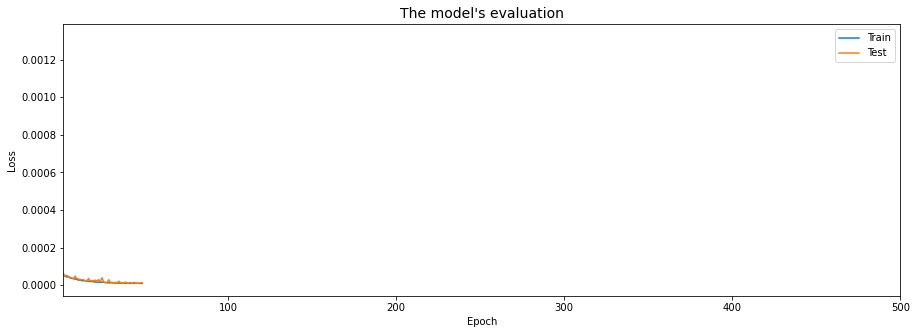

In [29]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Test'])
plt.title("The model's evaluation", fontsize=14)
plt.xlabel('Epoch')
plt.xlim(2,500)
plt.ylabel('Loss')
plt.show()

Predict the price

We will predict 300 datas

In [30]:
pred = []

pr = m.predict(np.array(df[-50:]))

pred.append(pr[0])

for i in range(1,50):
    pr = m.predict(np.concatenate((np.array(df[-50+i:]), pred[:]), axis=0))
    pred.append(pr[0])

for i in range(0,250):
    pr = m.predict(np.concatenate(pred[i:],axis=0).reshape(-1,1))
    pred.append(pr[0])

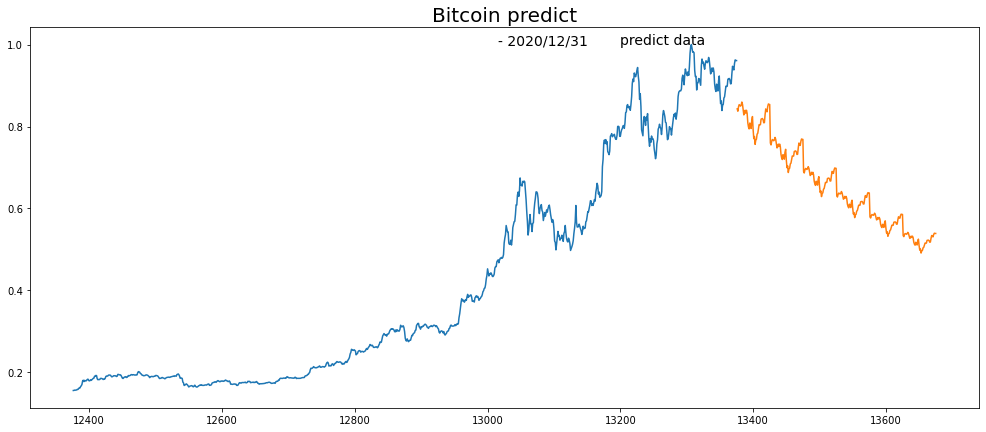

In [31]:
pred = pd.DataFrame(pred)

pred = pred.reset_index()

pred.columns = ['z','price']

pred.drop(['z'],axis=1,inplace=True)

data = pd.concat([df.reset_index().drop('Timestamp',axis=1),pred],ignore_index=True)

plt.figure(figsize=(17,7))
plt.plot(data[-1300:-300])
plt.title("Bitcoin predict",fontsize=20)
plt.text(13200,1,"predict data",fontsize=14)
plt.text(13015,1,"- 2020/12/31",fontsize=14)
plt.plot(data[-300:])
plt.show()

LSTM is the one of the powerful DeepLearning Algorithm. But, It can't predict the Bitcoin Price that have enormous increase never before